In [152]:
# imports 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [153]:
df1 = pd.read_csv("Kaggle Dataset/tmdb_5000_credits.csv",header = 0)
df2 = pd.read_csv("Kaggle Dataset/tmdb_5000_movies.csv",header = 0)
df1.columns = ['id','title','cast','crew']
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [154]:
#joining df1 with df2
del df1['title']
df3 = df2.merge(df1,on = 'id')
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

#### demographic filtering
using weighted rating for the scoring of movies to be recommended using demographic filtering
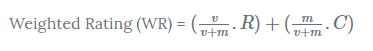

where,
v is the number of votes for the movie;(vote_count)
m is the minimum votes required to be listed in the chart;
R is the average rating of the movie;(vote_average) And
C is the mean vote across the whole report

In [155]:
# finding variables in the WR
C = df3['vote_average'].mean()
C

6.092171559442011

In [156]:
m = np.percentile(df3.vote_count,[90])[0] #or m = df3[vote_count].quantile(0.9) same as mentioned
m

1838.4000000000015

In [157]:
# filter out movies for demographic filter based on m
demo_movies = df3.loc[df3["vote_count"] > m]
demo_movies.shape

(481, 22)

In [158]:
#weighted rating function
def weighted_rating(df,C=C,m=m):
    v = df['vote_count']
    R = df['vote_average']
    wr = (v/(v+m)*R)+(m/(m+v)*C)
    return wr

In [159]:
#using wr function
demo_movies['score'] = demo_movies.apply(weighted_rating,axis=1)
#sort movies based on score
demo_movies = demo_movies.sort_values('score',ascending = False)
#top 10 movies
demo_movies[["title","vote_count","vote_average","score"]].head(10)

<ipython-input-159-07837534eab5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demo_movies['score'] = demo_movies.apply(weighted_rating,axis=1)


,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


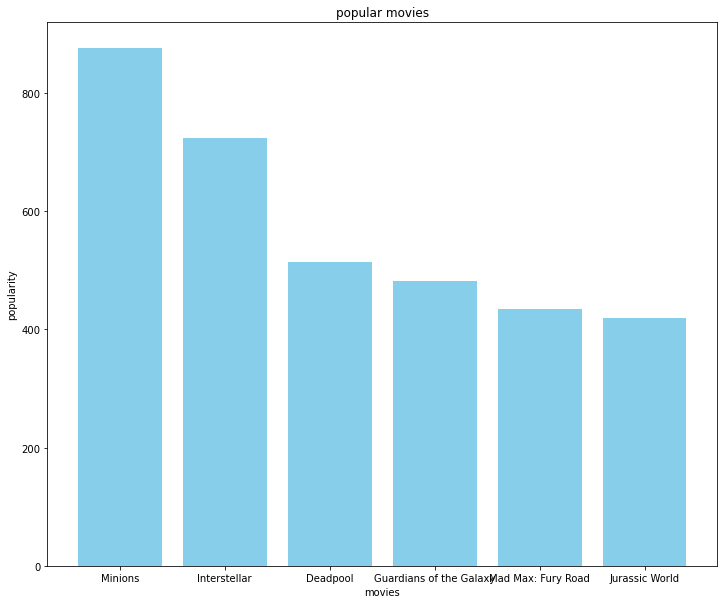

In [160]:
#popularity graph
pop = df3.sort_values('popularity',ascending = False)
plt.figure(figsize=(12,10))
x = pop['title'].head(6)
y = pop['popularity'].head(6)
plt.bar(x,y,align = 'center',color = 'skyblue')
plt.ylabel('popularity')
plt.xlabel('movies')
plt.title('popular movies')
plt.show()

#### content based  filtering

In [161]:
# Plot description based Recommender
df3.overview

0       In the 22nd century, a paraplegic Marine is di...
1       Captain Barbossa, long believed to be dead, ha...
2       A cryptic message from Bond’s past sends him o...
3       Following the death of District Attorney Harve...
4       John Carter is a war-weary, former military ca...
                              ...                        
4798    El Mariachi just wants to play his guitar and ...
4799    A newlywed couple's honeymoon is upended by th...
4800    "Signed, Sealed, Delivered" introduces a dedic...
4801    When ambitious New York attorney Sam is sent t...
4802    Ever since the second grade when he first saw ...
Name: overview, Length: 4803, dtype: object

In [162]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
df3['overview'] = df3['overview'].fillna('')
tfidf_matrix = tfidf.fit_transform(df3['overview'])
tfidf_matrix.shape

(4803, 20978)

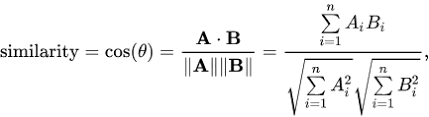

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [163]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similar = linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_similar.shape

(4803, 4803)

In [164]:
# construct a reverse map of indices and movie titles
indices =  pd.Series(df3.index, index = df3['title']).drop_duplicates()
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [165]:
# recommendation function for CF
def recommendations(title,cosine_similar = cosine_similar):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similar[idx]))
    sim_scores = sorted(sim_scores,key= lambda x:x[1],reverse = True)
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores]
    return df3['title'].iloc[movies_indices]
recommendations('The Dark Knight')

3                         The Dark Knight Rises
428                              Batman Returns
3854    Batman: The Dark Knight Returns, Part 2
299                              Batman Forever
1359                                     Batman
119                               Batman Begins
1181                                        JFK
9            Batman v Superman: Dawn of Justice
2507                                  Slow Burn
210                              Batman & Robin
Name: title, dtype: object

In [166]:
# Credits, Genres and Keywords Based Recommender
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [167]:
df3.genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [168]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast','crew','genres','keywords']
for feature in features:
    df3[feature] = df3[feature].apply(literal_eval)

In [169]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [170]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x,list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names
    #if malfunctioned or misshaped data 
    return []

In [171]:
# Define new director, cast, genres and keywords features/column that are in a suitable form.
df3['director'] = df3['crew'].apply(get_director)

features = ['cast','keywords','genres']
for feature in features:
    df3[feature] = df3[feature].apply(get_list)
df3['cast']

0        [Sam Worthington, Zoe Saldana, Sigourney Weaver]
1           [Johnny Depp, Orlando Bloom, Keira Knightley]
2            [Daniel Craig, Christoph Waltz, Léa Seydoux]
3            [Christian Bale, Michael Caine, Gary Oldman]
4          [Taylor Kitsch, Lynn Collins, Samantha Morton]
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799         [Edward Burns, Kerry Bishé, Marsha Dietlein]
4800           [Eric Mabius, Kristin Booth, Crystal Lowe]
4801            [Daniel Henney, Eliza Coupe, Bill Paxton]
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldman]
Name: cast, Length: 4803, dtype: object

In [172]:
# Print the new features of the first 3 films
df3[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [175]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x,str):
            return str.lower(x.replace(" ",""))
        else:
            return ''        

In [177]:
# Apply clean_data function to your features.
features = ['cast','genres','keywords','director']
for feature in features:
    df3[feature] = df3[feature].apply(clean_data)
df3[['cast','genres','keywords','director']].head(3)

,cast,genres,keywords,director
0,"[samworthington, zoesaldana, sigourneyweaver]","[action, adventure, fantasy]","[cultureclash, future, spacewar]",jamescameron
1,"[johnnydepp, orlandobloom, keiraknightley]","[adventure, fantasy, action]","[ocean, drugabuse, exoticisland]",goreverbinski
2,"[danielcraig, christophwaltz, léaseydoux]","[action, adventure, crime]","[spy, basedonnovel, secretagent]",sammendes


In [182]:
# str joint soup
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df3['soup'] = df3.apply(create_soup,axis=1)
df3.soup[0]

'cultureclash future spacewar samworthington zoesaldana sigourneyweaver jamescameron action adventure fantasy'

In [183]:
# Import CountVectorizer and create the count matrix
#The next steps are the same as what we did with our plot description based recommender. 
#One important difference is that we use the CountVectorizer() instead of TF-IDF. 
#This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df3['soup'])